# 股票及版块收益率相关系数

## 本段代码使用quantOS系统计算申万28个一级行业日收益率的相关系数，以及部分个股间相关系数

## 系统设置

In [4]:
# encoding: utf-8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import matplotlib.mlab as mlab
import scipy.stats as stats

sns.set_style('darkgrid')
sns.set_context('poster')
%matplotlib inline

In [5]:
from jaqs.data import RemoteDataService
import jaqs.util as jutil
from __future__ import print_function, unicode_literals, division, absolute_import

from jaqs.data import RemoteDataService, DataView

In [6]:
dataview_dir_path = '.'
backtest_result_dir_path = '.'

import os
phone = os.environ.get('QUANTOS_USER')
token = os.environ.get('QUANTOS_TOKEN')

data_config = {
  "remote.data.address": "tcp://data.quantos.org:8910",
  "remote.data.username": phone,
  "timeout": 3600,
  "remote.data.password": token
}

ds = RemoteDataService()
ds.init_from_config(data_config)


Begin: DataApi login 17321165656@tcp://data.quantos.org:8910
    login success 



'0,'

## 设置参数

In [45]:
STARTDATE, ENDDATE = 20160401, 20180330

## 计算个股相关系数

## 1. 工商银行与建设银行

In [16]:
stock_1, _ = ds.daily('601398.SH', STARTDATE, ENDDATE, fields = 'close', adjust_mode = 'post')
stock_2, _ = ds.daily('601939.SH', STARTDATE, ENDDATE, fields = 'close', adjust_mode = 'post')

In [24]:
stock_1['ret'] = stock_1['close'].pct_change()
stock_1 = stock_1.set_index('trade_date')
stock_2['ret'] = stock_2['close'].pct_change()
stock_2 = stock_2.set_index('trade_date')

In [28]:
stock_pair = pd.concat([stock_1['ret'], stock_2['ret']], axis = 1)
stock_pair.columns = ['工商银行', '建设银行']

### 相关性矩阵

In [30]:
stock_pair.corr()

,工商银行,建设银行
工商银行,1.000000,0.847851
建设银行,0.847851,1.000000


### 收益率分布

Text(0,0.5,'601939.SH')

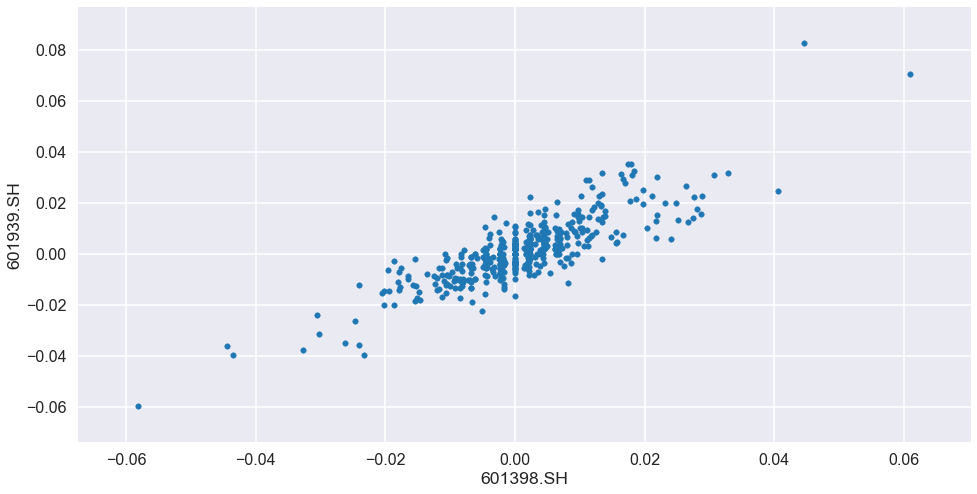

In [44]:
fig, ax = plt.subplots(figsize = (16, 8))
plt.scatter(stock_pair['工商银行'], stock_pair['建设银行'], s = 30)
ax.set_xlabel('601398.SH')
ax.set_ylabel('601939.SH')

## 2. 工商银行与中国平安

In [46]:
stock_1, _ = ds.daily('601398.SH', STARTDATE, ENDDATE, fields = 'close', adjust_mode = 'post')
stock_2, _ = ds.daily('601318.SH', STARTDATE, ENDDATE, fields = 'close', adjust_mode = 'post')

In [47]:
stock_1['ret'] = stock_1['close'].pct_change()
stock_1 = stock_1.set_index('trade_date')
stock_2['ret'] = stock_2['close'].pct_change()
stock_2 = stock_2.set_index('trade_date')

In [48]:
stock_pair = pd.concat([stock_1['ret'], stock_2['ret']], axis = 1)
stock_pair.columns = ['工商银行', '中国平安']

### 相关性矩阵

In [49]:
stock_pair.corr()

,工商银行,中国平安
工商银行,1.000000,0.367732
中国平安,0.367732,1.000000


### 收益率分布

Text(0,0.5,'601318.SH')

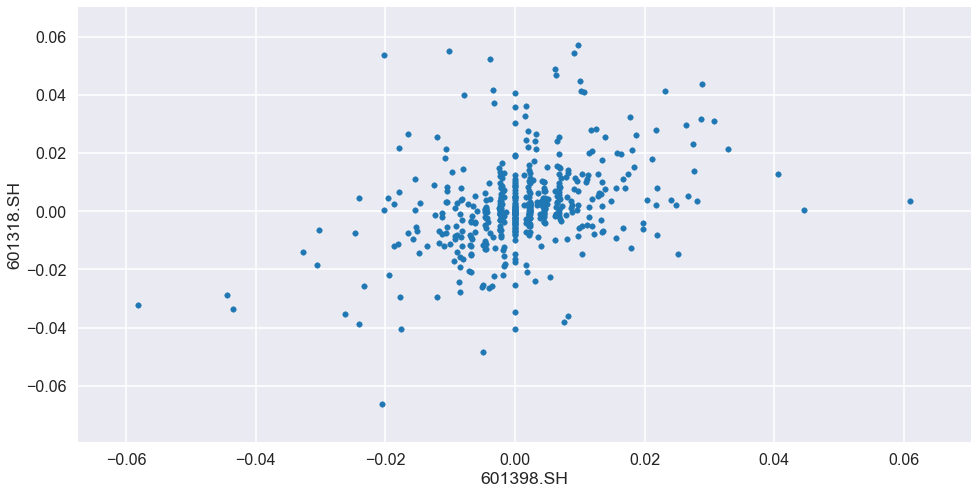

In [50]:
fig, ax = plt.subplots(figsize = (16, 8))
plt.scatter(stock_pair['工商银行'], stock_pair['中国平安'], s = 30)
ax.set_xlabel('601398.SH')
ax.set_ylabel('601318.SH')

## 3. 工商银行与天齐锂业

In [51]:
stock_1, _ = ds.daily('601398.SH', STARTDATE, ENDDATE, fields = 'close', adjust_mode = 'post')
stock_2, _ = ds.daily('002466.SZ', STARTDATE, ENDDATE, fields = 'close', adjust_mode = 'post')

In [52]:
stock_1['ret'] = stock_1['close'].pct_change()
stock_1 = stock_1.set_index('trade_date')
stock_2['ret'] = stock_2['close'].pct_change()
stock_2 = stock_2.set_index('trade_date')

In [53]:
stock_pair = pd.concat([stock_1['ret'], stock_2['ret']], axis = 1)
stock_pair.columns = ['工商银行', '天齐锂业']

### 相关性矩阵

In [54]:
stock_pair.corr()

,工商银行,天齐锂业
工商银行,1.000000,-0.081202
天齐锂业,-0.081202,1.000000


### 收益率分布

Text(0,0.5,'002466.SZ')

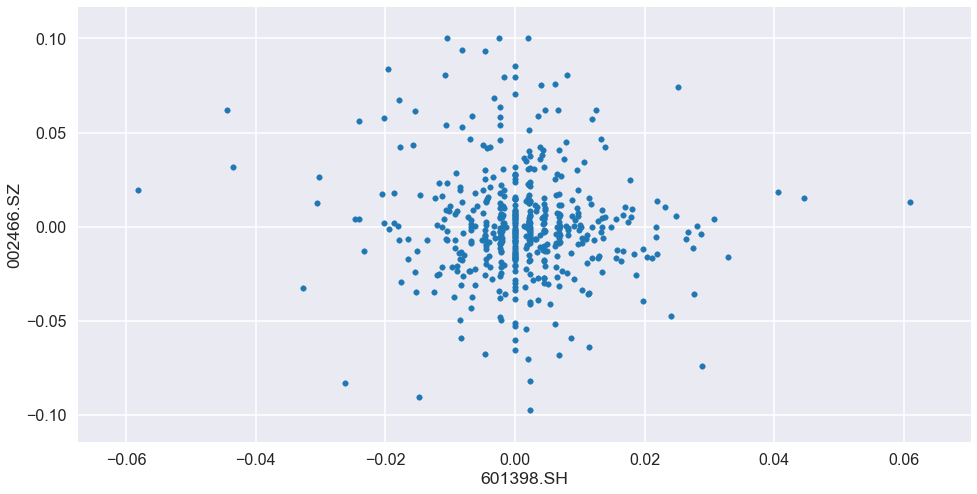

In [55]:
fig, ax = plt.subplots(figsize = (16, 8))
plt.scatter(stock_pair['工商银行'], stock_pair['天齐锂业'], s = 30)
ax.set_xlabel('601398.SH')
ax.set_ylabel('002466.SZ')

## 计算版块相关系数

In [88]:
df_ret = pd.read_csv('lecture16_industry_daily_ret.csv', index_col = 'trade_date')

In [90]:
df_ret_copy = df_ret.loc[20160401:20180330, :]

In [91]:
ret_corr = df_ret_copy.corr()

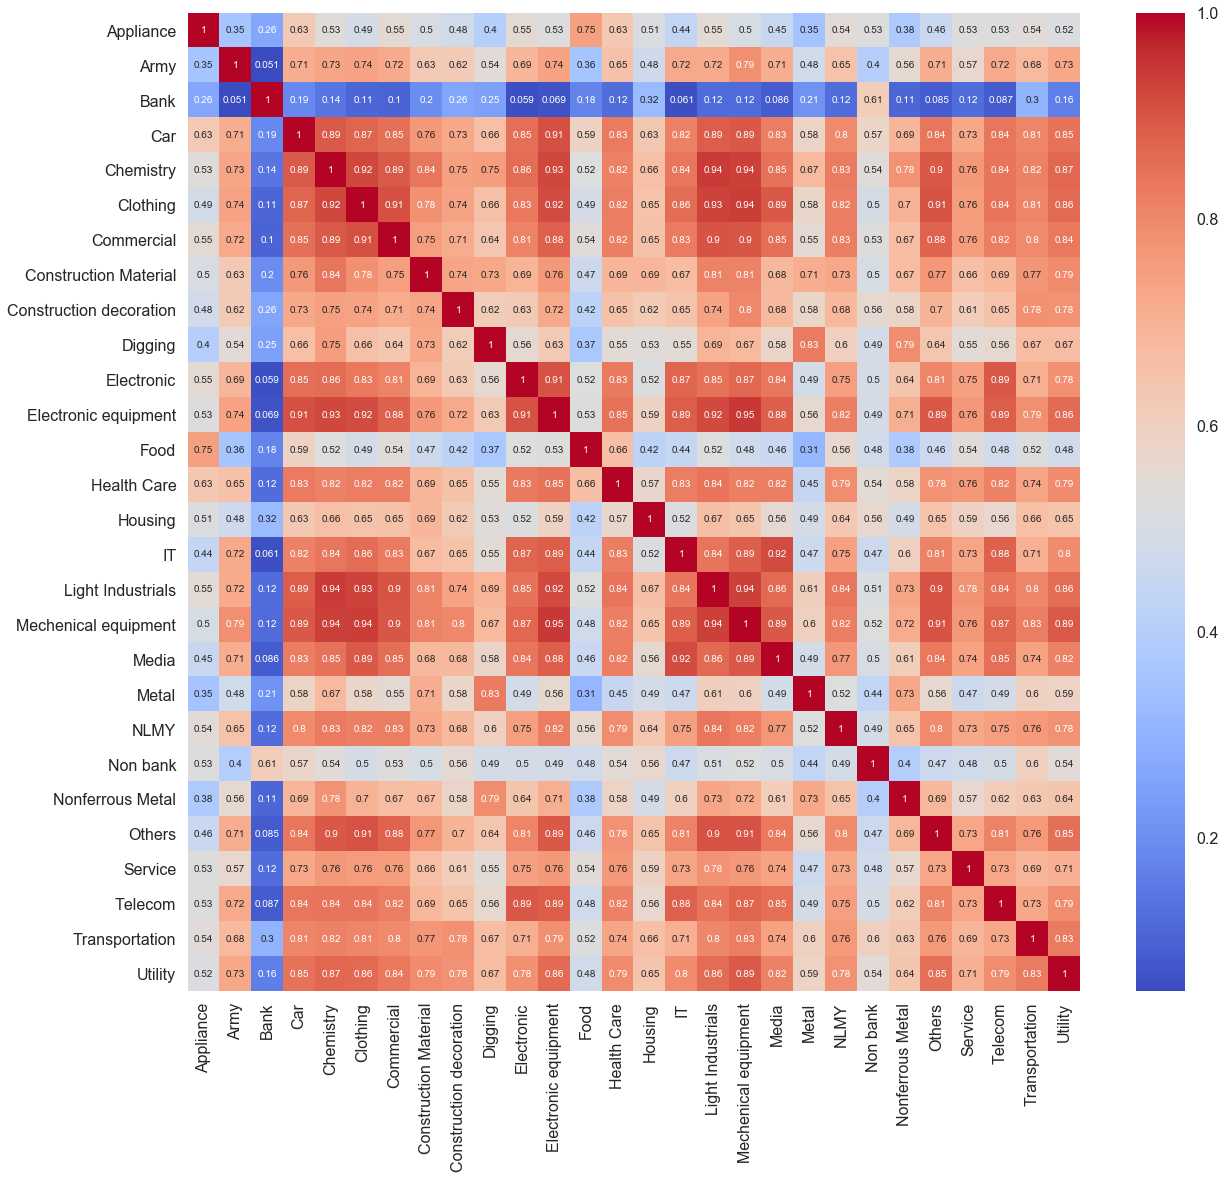

In [92]:
fig, ax = plt.subplots(figsize = (20, 18))
sns.heatmap(ret_corr, annot = True, cmap = "coolwarm")
# fig.savefig('corrlation_matrix.png')